In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

ModuleNotFoundError: No module named 'tensorflow.python.ops.tensor_getitem_override'

# Specify each path

In [ ]:
dataset = 'model/keypoint_classifier/keypointCHAR.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifierCHAR.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifierCHAR.tflite'

# Set number of classes

In [ ]:
NUM_CLASSES = 60

# Dataset reading

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 60)             │           660 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,730 (6.76 KB)

 Trainable params: 1,730 (6.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
37/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0190 - loss: 4.0712
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifierCHAR.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0209 - loss: 4.0631 - val_accuracy: 0.0692 - val_loss: 3.9055
Epoch 2/1000
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0602 - loss: 3.8495
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifierCHAR.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0622 - loss: 3.8367 - val_accuracy: 0.0790 - val_loss: 3.4956
Epoch 3/1000
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0939 - loss: 3.4259
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifierCHAR.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0941 - loss: 3.4217 - val_accuracy: 0.1231 - val_loss: 3.0428
Epoch 4/1000
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1156 - loss: 3.0674
Epoch 4: saving model to model/keypoint_classifier/keypoint_class

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7942 - loss: 0.7934


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
[9.27193183e-03 7.20353796e-07 5.90570446e-04 1.10924564e-04
 9.38608311e-03 1.06228370e-07 1.85599364e-03 9.91386324e-02
 3.92147452e-01 8.05511326e-03 2.26813648e-03 2.00942382e-02
 2.20587454e-03 2.96702147e-01 2.82761250e-02 5.22866912e-07
 7.83556243e-06 6.99352370e-07 5.72133111e-04 4.17173487e-06
 4.00760805e-12 7.36379847e-02 5.74004371e-04 9.22119436e-14
 7.48979999e-03 4.76088412e-02 8.43283895e-15 9.24920730e-13
 2.11675058e-14 6.54191328e-14 3.84537801e-12 5.84504530e-15
 1.58881025e-12 2.40554890e-13 1.07792447e-14 1.47146143e-13
 8.41444563e-14 4.29520345e-14 1.15990862e-13 1.12770958e-13
 7.79090063e-13 1.06420508e-13 2.49414286e-13 3.82852658e-14
 1.03919456e-12 4.02726789e-13 2.21883601e-13 1.98357693e-12
 1.55654721e-12 5.79550065e-15 4.51380944e-14 6.55887969e-14
 3.21820614e-13 4.88145731e-14 1.07555092e-13 2.47529601e-12
 6.65931123e-13 1.35326957e-13 4.84878454e-14 3.26179039e-14]
8


# Confusion matrix

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


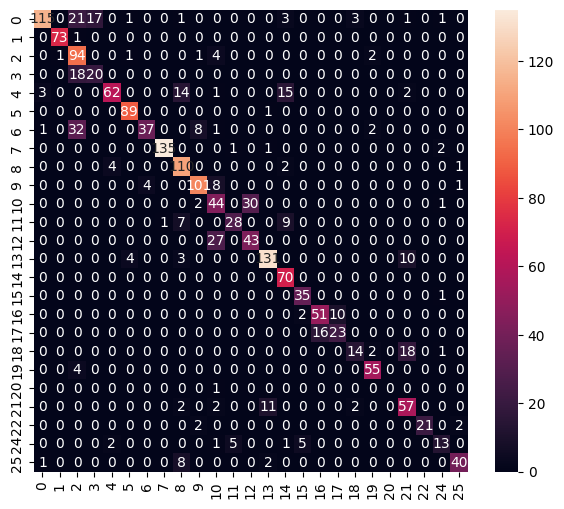

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.71      0.81       163
           1       0.99      0.99      0.99        74
           2       0.55      0.91      0.69       103
           3       0.54      0.53      0.53        38
           4       0.91      0.64      0.75        97
           5       0.94      0.99      0.96        90
           6       0.90      0.46      0.61        81
           7       0.99      0.97      0.98       139
           8       0.76      0.94      0.84       117
           9       0.89      0.89      0.89       114
          10       0.49      0.57      0.53        77
          11       0.82      0.62      0.71        45
          12       0.59      0.61      0.60        70
          13       0.90      0.89      0.89       148
          14       0.70      1.00      0.82        70
          15       0.83      0.97      0.90        36
          16       0.76      0.81      0.78        63
     

c:\Users\mrpra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mrpra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mrpra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\mrpra\AppData\Local\Temp\tmp6kxlarpn\assets


INFO:tensorflow:Assets written to: C:\Users\mrpra\AppData\Local\Temp\tmp6kxlarpn\assets


Saved artifact at 'C:\Users\mrpra\AppData\Local\Temp\tmp6kxlarpn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 60), dtype=tf.float32, name=None)
Captures:
  1244396148464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1244523482624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1244342295136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1244517587024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1244523512928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1244517452784: TensorSpec(shape=(), dtype=tf.resource, name=None)


9096

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\mrpra\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.27193463e-03 7.20351920e-07 5.90569223e-04 1.10924280e-04
 9.38608963e-03 1.06227688e-07 1.85599166e-03 9.91385505e-02
 3.92147571e-01 8.05511139e-03 2.26813508e-03 2.00942326e-02
 2.20587524e-03 2.96702117e-01 2.82761175e-02 5.22864582e-07
 7.83554970e-06 6.99350551e-07 5.72131597e-04 4.17172805e-06
 4.00759330e-12 7.36379847e-02 5.74003439e-04 9.22114422e-14
 7.48979347e-03 4.76088338e-02 8.43279236e-15 9.24915635e-13
 2.11674702e-14 6.54186449e-14 3.84535676e-12 5.84499066e-15
 1.58880439e-12 2.40553562e-13 1.07791651e-14 1.47145628e-13
 8.41441513e-14 4.29517194e-14 1.15989995e-13 1.12770551e-13
 7.79082853e-13 1.06419715e-13 2.49412904e-13 3.82850557e-14
 1.03919293e-12 4.02725352e-13 2.21883221e-13 1.98356978e-12
 1.55654753e-12 5.79545745e-15 4.51380198e-14 6.55883090e-14
 3.21820072e-13 4.88143969e-14 1.07554699e-13 2.47528734e-12
 6.65927491e-13 1.35326483e-13 4.84875777e-14 3.26176633e-14]
8
